# Lab 1: Simulating Quantum Circuits with QISKit
* Author: B08901049 Yuan-Chia Chang
* Instructor: Professor Hao-Chung Cheng
* TA: Chia-Yi Chou
* Created: 9/29/2021(Wed)
* Last edited: 9/29/2021(Wed)
* Contact: b08901049@ntu.edu.tw
* Collaborator: B08901002 Chen-Han Lin, B08901209 Yu-Hsiang Lin

## Import some packages

In [2]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

## Some Utilities

In [3]:
statevector_simulator = Aer.get_backend('statevector_simulator')
qasm_simulator = Aer.get_backend('qasm_simulator')

## Q1

### 1(a)(b)(c)(d)
skip

### 1(e)

In [42]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.reset(q)
circuit.x(q[0]) # substitute x by y, z for making different gates 
circuit.draw()

┌───┐
q209_0: ─|0>─┤ X ├
             └───┘
q209_1: ─|0>──────
                  
 c21: 2/══════════

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


C:\Users\USER\anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


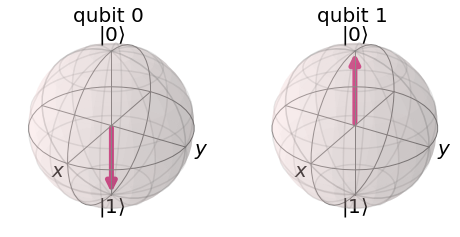

In [41]:
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

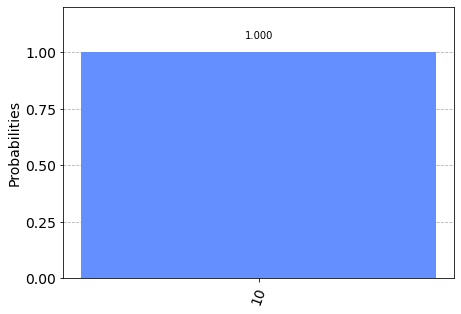

In [39]:
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### 1(f)

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


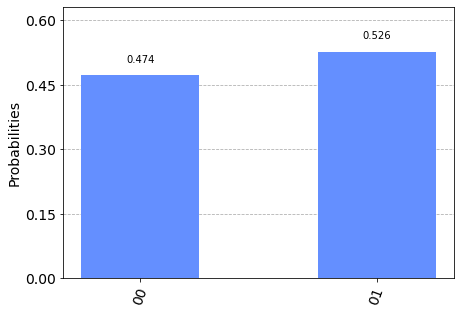

In [53]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### 1(g)

[0.70710678+0.j         0.        -0.70710678j]


C:\Users\USER\anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


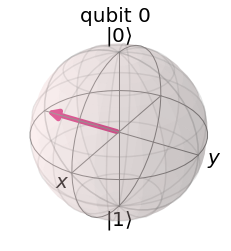

In [50]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.rx(pi/2, q[0]) # substitute rx by ry, rz for making different gates 
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

### 1(h) 

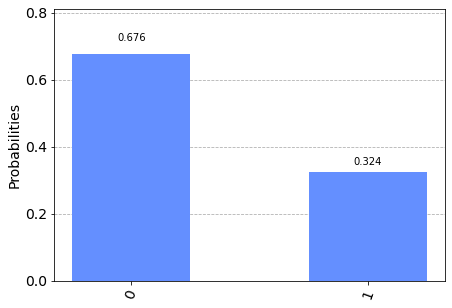

In [49]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.ry(pi/9, q[0])
circuit.h(q[0]) #for measuring in Hadamard bases[2]
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Q2

### 2(a)

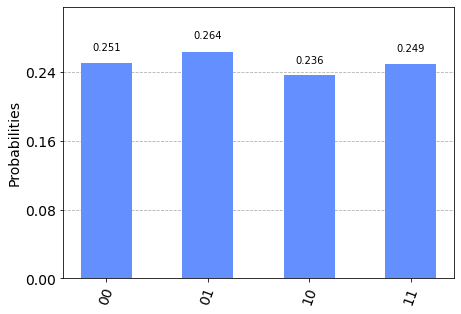

In [43]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.h(q[1])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots = 1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### 2(b)

In [44]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1]) #[3]
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


### 2(c)

In [45]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.h(q[0])
circuit.h(q[1])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.70710678-8.65956056e-17j 0.        +8.65956056e-17j
 0.        +8.65956056e-17j 0.70710678-8.65956056e-17j]


### 2(d) [4][5]

#### Phi -

In [46]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.x(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


#### Psi +

In [47]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.z(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[ 0.70710678+0.j -0.        +0.j  0.        +0.j -0.70710678+0.j]


#### Psi -

In [48]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.cx(q[0], q[1])
circuit.z(q[0])
circuit.x(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[ 4.32978028e-17+0.j  7.07106781e-01+0.j -7.07106781e-01+0.j
  4.32978028e-17+0.j]


### 2(e)

In [ ]:
# 1. prepare the state which will give the 10 higher probability than 01
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.ry(pi/4, q[0])
circuit.cx(q[0], q[1])
circuit.x(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

In [ ]:
# 2. use swap gate
circuit.swap(q[0], q[1])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

In [ ]:
# 1. prepare the state which will give the 10 higher probability than 01
q = QuantumRegister(2)
c = ClassicalRegister(2)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.ry(pi/4, q[0])
circuit.cx(q[0], q[1])
circuit.x(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)


In [ ]:
# 2. use three CNOT gate to replicate SWAP gate
circuit.cx(q[1],q[0])
circuit.cx(q[0],q[1])
circuit.cx(q[1],q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

## Q3

### 3(a)

In [ ]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.x(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

In [ ]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
circuit.y(q[0])
circuit.z(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

### 3(c)

In [ ]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.x(q[0])
circuit.h(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

In [ ]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
circuit = QuantumCircuit(q,c)
circuit.h(q[0])
job = execute(circuit, statevector_simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

## Q4

In [20]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
circuit = QuantumCircuit(q,c)
circuit.initialize([1/np.sqrt(2), -1/np.sqrt(2)], 0)
circuit.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 1)
circuit.draw()
circuit.h(q[2])
circuit.cswap(q[2],q[0],q[1])
circuit.h(q[2])
circuit.x(q[2])
circuit.draw()


┌──────────────────────────────┐             
q75_0: ┤ Initialize(0.70711,-0.70711) ├─X───────────
       ├─────────────────────────────┬┘ │           
q75_1: ┤ Initialize(0.70711,0.70711) ├──X───────────
       └────────────┬───┬────────────┘  │ ┌───┐┌───┐
q75_2: ─────────────┤ H ├───────────────■─┤ H ├┤ X ├
                    └───┘                 └───┘└───┘
c11: 3/═════════════════════════════════════════════

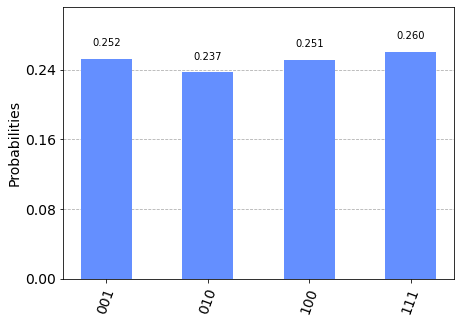

In [21]:
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots=1024, memory=True) #For getting the information of every shots[6]
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Q5

### 5(a)

In [4]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
circuit = QuantumCircuit(q,c)
for i in range(5):
    circuit.h(q[i])
circuit.measure(q,c)
job = execute(circuit, qasm_simulator, shots=1024, memory=True) #For getting the information of every shots[6]
result = job.result()
counts = result.get_memory()
for i in counts:
    print(int(i,2))

21
11
25
16
18
18
4
23
11
5
26
14
11
19
17
22
27
2
9
7
19
26
24
15
31
3
4
3
28
24
25
29
15
15
10
22
26
28
15
21
3
22
16
21
8
8
3
10
2
0
29
15
31
25
16
13
18
25
25
2
9
21
1
15
17
18
9
6
29
2
4
19
18
20
26
30
4
3
17
25
23
30
12
28
30
1
29
1
11
19
21
31
31
18
9
20
17
5
2
13
4
7
20
30
26
24
12
3
14
15
2
15
11
30
25
31
22
16
26
16
1
19
3
1
27
1
10
15
31
5
21
8
5
22
23
14
2
13
14
10
4
3
24
8
14
13
1
19
5
5
27
26
12
12
27
10
12
5
9
15
8
31
3
11
1
11
26
4
19
7
9
15
17
11
13
21
9
26
1
31
6
25
5
12
25
12
18
21
26
6
14
6
17
5
27
31
15
10
11
15
10
14
10
0
27
0
26
21
24
14
16
0
23
3
4
15
10
16
24
1
27
23
21
14
1
8
9
28
26
11
28
2
24
4
6
18
29
0
26
19
23
21
14
5
13
10
3
27
7
29
10
14
3
12
15
12
7
14
11
7
24
22
5
31
22
25
20
7
15
31
6
23
14
18
5
24
2
15
13
14
6
29
0
23
1
0
25
12
7
12
2
7
15
4
8
26
18
30
2
28
7
24
0
5
1
7
13
30
7
12
30
12
5
13
0
20
10
2
29
23
19
20
2
30
10
11
25
31
9
11
25
12
25
16
27
16
30
28
21
20
29
14
4
13
14
12
28
23
15
18
30
29
15
18
27
16
0
29
3
10
24
7
21
16
10
17
27
17
29
28


### 5(b)

In [ ]:
api_token = "1a1095eb06da72eb4ec3f07a7c583eb84d89a9d96e3cec78db81374e92af3c3f3fa5ecaaf5821bc5c166c41d9615fd2ac7b72615f3e8a77b15532ab10395a66f"
IBMQ.save_account(api_token)
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q', group = 'open',project = 'main')
qcomp = provider.get_backend('ibmq_santiago')

In [ ]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
circuit = QuantumCircuit(q,c)
for i in range(5):
    circuit.h(q[i])
circuit.measure(q,c)
job = execute(circuit, backend = qcomp, shots=20, memory=True) #For getting the information of every shots
from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
counts = result.get_memory()
for i in counts:
    print(int(i,2))

## References

[2] https://quantumcomputing.stackexchange.com/questions/13605/how-to-measure-in-another-basis \
[3] https://qiskit.org/textbook/ch-gates/more-circuit-identities.html \
[4] https://en.wikipedia.org/wiki/Bell_state \
[5] https://en.wikipedia.org/wiki/Quantum_logic_gate \
[6] https://quantumcomputing.stackexchange.com/questions/5308/qiskit-per-shot-result